In [ ]:
#Encode the categorial data values
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.iloc[:5,1:5]

,Patient ID,Sample ID,Tumor Stage,Cancer Type
0,Patient0001,P-0001,IV,Colorectal Carcinoma
1,Patient0002,P-0002,II,Colorectal Carcinoma
2,Patient0003,P-0003,III,Colorectal Carcinoma
3,Patient0004,P-0004,III,Colorectal Carcinoma
4,Patient0005,P-0005,I,Liver Hepatocellular Carcinoma


In [ ]:
a=[]
for i in df['Tumor Stage']:
  if(i=='Unknown'):
    a.append(random.randint(1,3))
  elif(i=='0'):
    a.append(0)
  elif(i=='I'):
    a.append(1)
  elif(i=='I-II'):
    a.append(random.randint(1,2))
  elif(i=='III-IV'):
    a.append(random.randint(3,4))
  elif(i=='II'):
    a.append(2)
  elif(i=='III'):
    a.append(3)
  elif(i=='IV'):
    a.append(4)
df_usable['Tumor Stage']=a

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


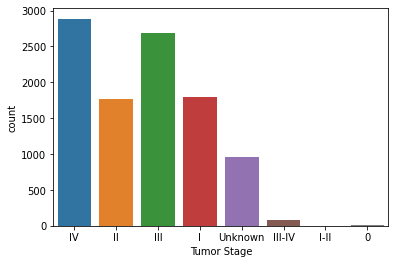

In [ ]:
sns.countplot(df['Tumor Stage'],label='count')

In [ ]:
df_usable.dtypes

Study ID                          object
Patient ID                        object
Sample ID                         object
Tumor Stage                        int64
Cancer Type                        int64
Cancer Type Detailed               int64
Sample Coverage                  float64
Diagnosis Age                      int64
DNA Input                          int64
Mutation Count                   float64
Number of Samples Per Patient      int64
Sample Type                        int64
Sex                                int64
Smoke Status                       int64
Specimen Preservation Type         int64
Specimen Type                      int64
TMB (nonsynonymous)              float64
Treatment                          int64
Tumor Purity                       int64
dtype: object

In [ ]:
df_usable=df.copy()

In [ ]:
coder=LabelEncoder()
coder.fit(df['Tumor Stage'])
df_usable['Tumor Stage']=coder.transform(df['Tumor Stage'])
coder.fit(df['Cancer Type'])
df_usable['Cancer Type']=coder.transform(df['Cancer Type'])
coder.fit(df['Cancer Type Detailed'])
df_usable['Cancer Type Detailed']=coder.transform(df['Cancer Type Detailed'])
coder.fit(df['Sample Type'])
df_usable['Sample Type']=coder.transform(df['Sample Type'])
coder.fit(df['Sex'])
df_usable['Sex']=coder.transform(df['Sex'])
coder.fit(df['Smoke Status'])
df_usable['Smoke Status']=coder.transform(df['Smoke Status'])
coder.fit(df['Specimen Preservation Type'])
df_usable['Specimen Preservation Type']=coder.transform(df['Specimen Preservation Type'])
coder.fit(df['Specimen Type'])
df_usable['Specimen Type']=coder.transform(df['Specimen Type'])
coder.fit(df['Treatment'])
df_usable['Treatment']=coder.transform(df['Treatment'])

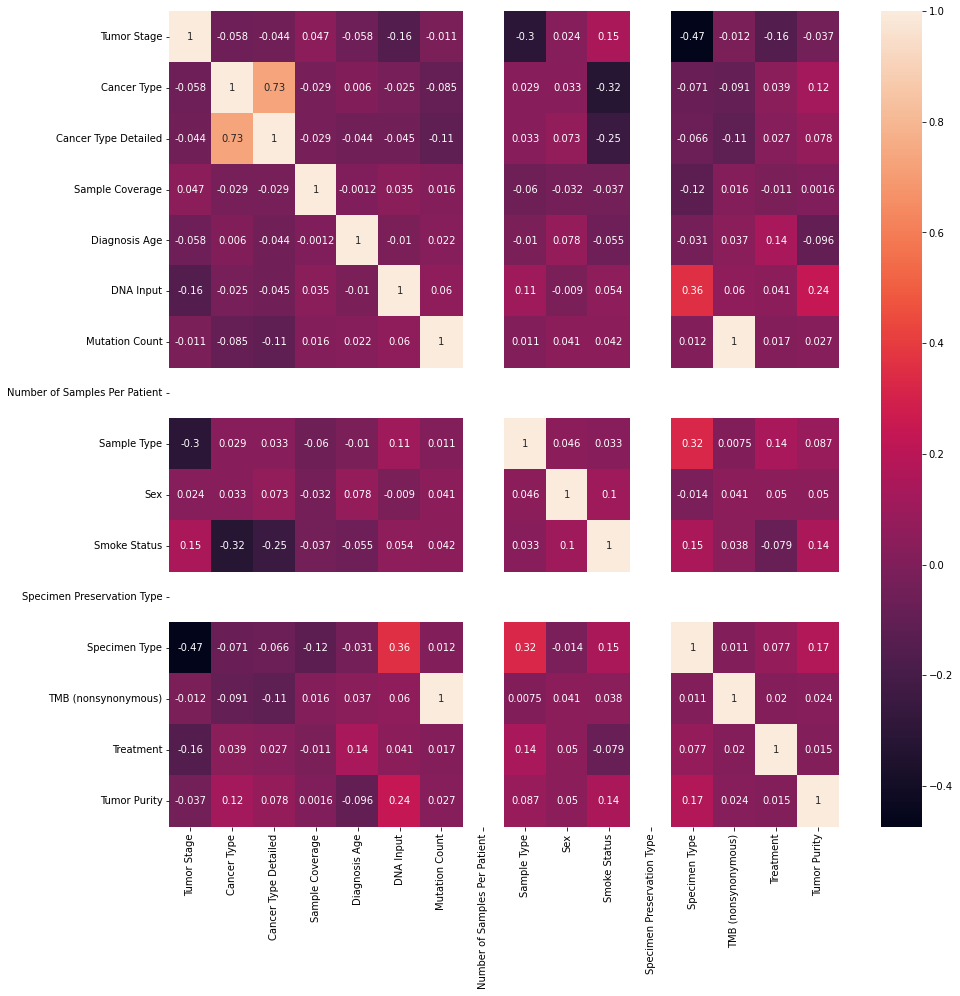

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_usable.iloc[:,3:].corr(),annot=True)

In [ ]:
df_usable['Mutation Count']=df_usable['Mutation Count'].fillna(df_usable['Mutation Count'].mean())

In [ ]:
X=df_usable[['Specimen Type','Sample Type','DNA Input','TMB (nonsynonymous)','Sex','Diagnosis Age','Tumor Purity','Treatment']]
# X=df_usable[['Specimen Type','Sample Type']]
y=df_usable['Tumor Stage']
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.25, random_state = 0)
X.head()

,Specimen Type,Sample Type,DNA Input,TMB (nonsynonymous),Sex,Diagnosis Age,Tumor Purity,Treatment
0,1,1,4776,0.333333,0,67,45,7
1,1,1,3876,0.300000,1,75,40,31
2,1,1,9720,0.500000,0,45,45,31
3,1,1,33840,7.266667,1,70,60,31
4,1,1,2412,0.166667,1,53,85,31


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error

In [ ]:
df_model=RandomForestRegressor(random_state=1)
df_model.fit(train_X, train_y)
val_predictions=df_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

1.230062769713613


In [ ]:
X.head()

,Cancer Type,Cancer Type Detailed,DNA Input,Diagnosis Age,Mutation Count,Sample Coverage,Sample Type,Sex,Smoke Status,Specimen Type,TMB (nonsynonymous),Treatment,Tumor Purity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 from sklearn.metrics import accuracy_score
 accuracy_score(val_y,val_predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(val_y,val_predictions)

2.6684121224009414